# Linear Regression (hardway)

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
# import quandl

In [ ]:
style.use('ggplot')
pd.set_option('display.max_rows', None)

#### Importing data

In [ ]:
df = quandl.get("WIKI/GOOGL")

In [ ]:
df = pd.read_csv('my_data.csv', sep='\t').set_index('Date')

#### Preparing data

In [ ]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

#### Choosing the feature to forecast

In [ ]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

#### Splitting between X columns and y column

In [ ]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

#### Splitting between train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Uploading and training the model

In [ ]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

#### Calculating the accuracy

In [ ]:
confidence = clf.score(X_test, y_test)

#### Plotting the data

In [ ]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Linear Regression (easyway)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [33]:
x = np.array([1, 10, 20, 40, 60, 71, 80, 95, 120, 125])
y = np.array([3, 20, 90, 110, 130, 170, 150, 220, 260, 300])
x = x.reshape(-1, 1)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred = lin_reg.predict(x)
print(lin_reg.coef_) # slope (m/B0)
print(lin_reg.intercept_) # intercept (c/B0)

[2.14221075]
12.054491647432457


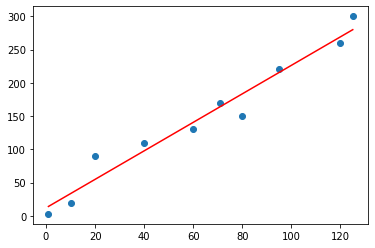

In [36]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

# Logistic Regression

#### 1 Import the required modules

In [37]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

#### 2 Generate the dataset

In [38]:
x, y = make_classification(
	n_samples=100,
	n_features=1,
	n_classes=2,
	n_clusters_per_class=1,
	flip_y=0.03,
	n_informative=1,
	n_redundant=0,
	n_repeated=0
	)
print(x[:5])
print(*y[:5], sep='\n')

[[-0.13457791]
 [ 1.11958988]
 [-1.57899872]
 [-0.47643171]
 [ 1.1243653 ]]
0
1
0
0
1


#### 3 Visualize the data

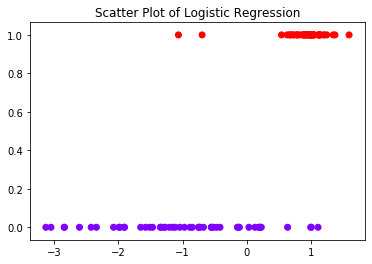

In [39]:
plt.scatter(x, y, c=y, cmap="rainbow")
plt.title('Scatter Plot of Logistic Regression')
plt.show()

#### 4 Split the dataset

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(x_train.shape)
print(x_test.shape)

(75, 1)
(25, 1)


#### 5 Perform the logistic regression

In [41]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 6 Make a prediction using the model

In [42]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1])

#### 7 Display the confusion matrix

In [43]:
print(confusion_matrix(y_test, y_pred))

[[10  3]
 [ 0 12]]
